In [87]:
from PIL import Image, ImageFilter, ImageChops
from sklearn.decomposition import NMF
from sklearn.cluster import k_means
import numpy as np

(1080, 1920)
[[119. 119. 119. ... 229. 227. 227.]
 [118. 118. 118. ... 229. 227. 227.]
 [120. 120. 120. ... 229. 227. 227.]
 ...
 [ 59.  59.  57. ...  48.  47.  44.]
 [ 60.  60.  61. ...  48.  46.  42.]
 [ 59.  59.  61. ...  47.  44.  42.]]


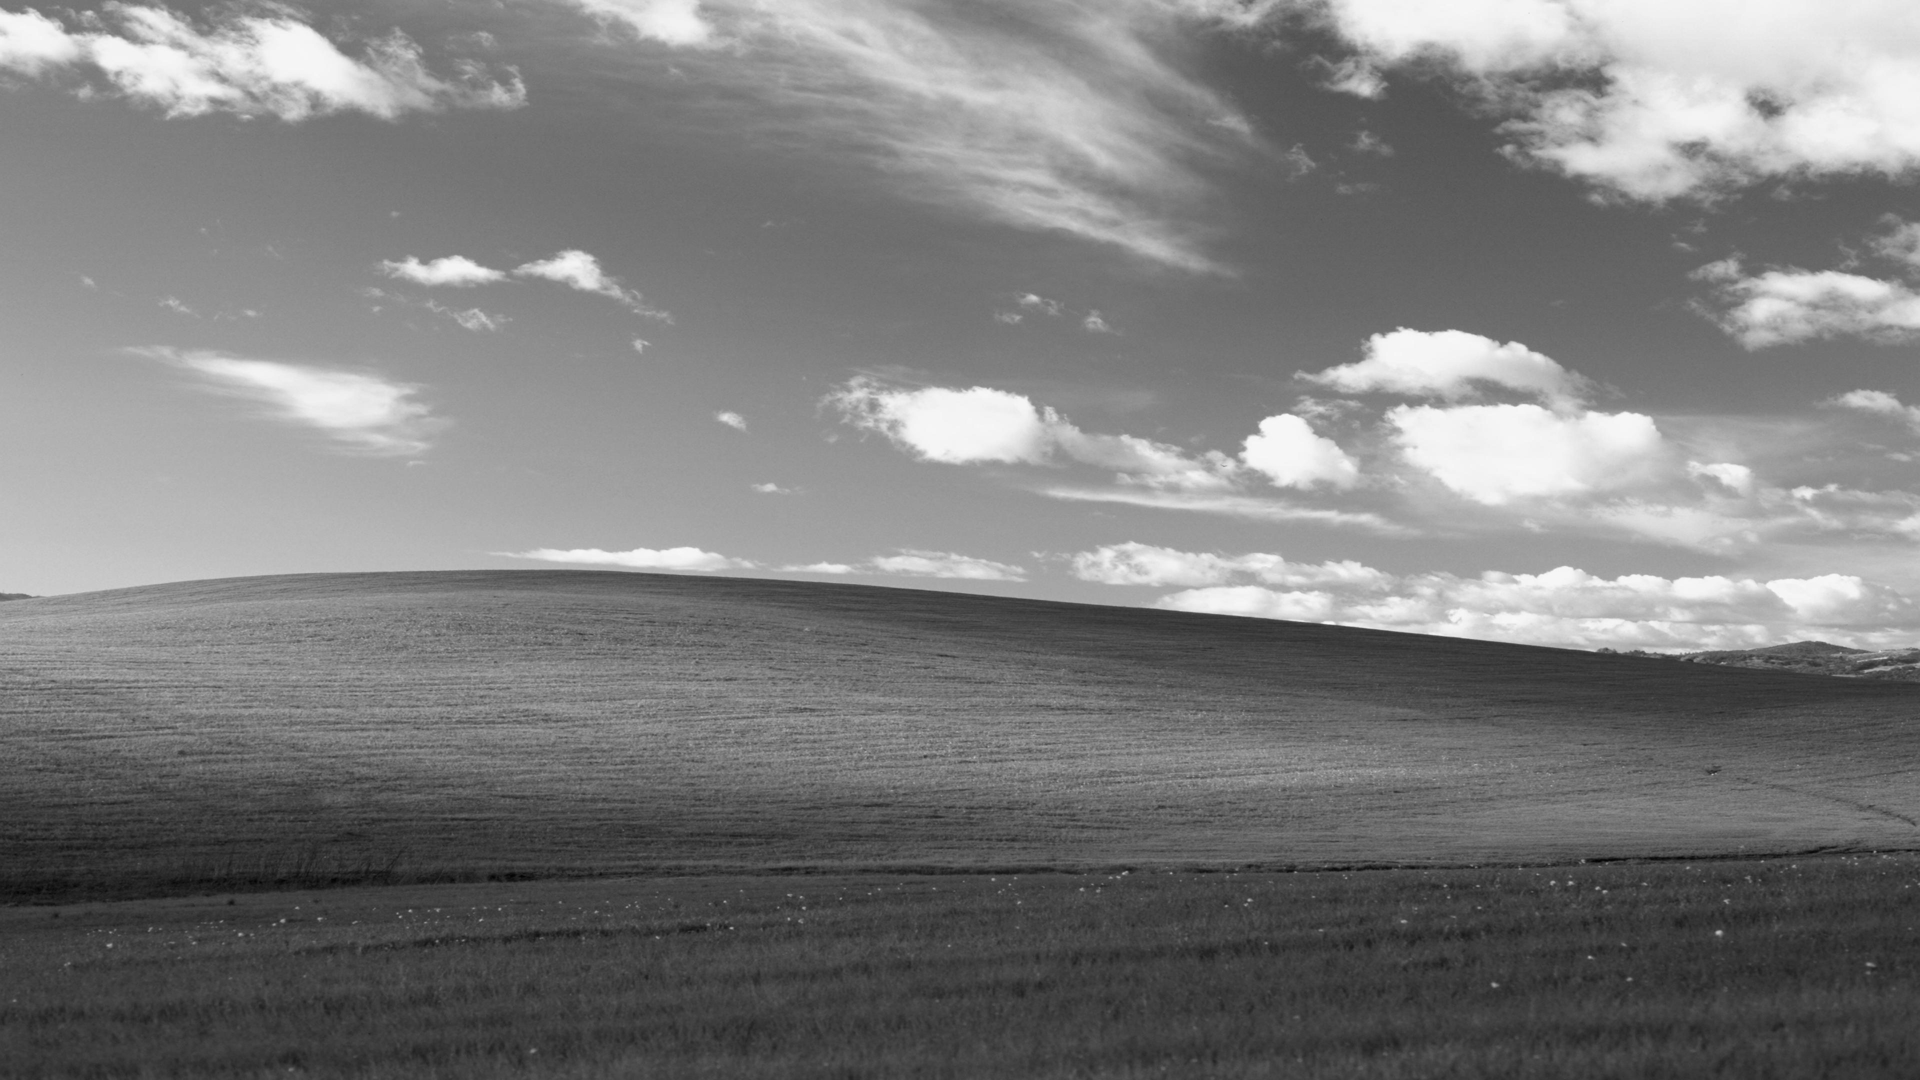

In [2]:
#Load image
img = Image.open("bliss.png")
img = img.convert('L')
X = np.array(img).astype(dtype= float)

print(X.shape)
print(X)
img

PCA

In [12]:
# each column represents a data point

print(X.shape[1])
X.mean(axis=1) # mean of column 

1920


array([180.8265625 , 180.86197917, 180.5828125 , ...,  62.11770833,
        61.8578125 ,  61.6203125 ])

In [47]:
k = 50 #hyperparameter

#Calculate Covariance Matrix
X_ = X - X.mean(axis=0)[np.newaxis,:]
#X_ =(X.T - X.mean(axis=1)[np.newaxis,:]).T
n = X.shape[1]

S = 1/n * np.dot(X_,X_.T)
S = S.round(decimals=0, out=None)

S.shape

(1080, 1080)

In [52]:
#Calculate Principal Components
eigvals, eigvecs = np.linalg.eig(S)
W = eigvecs[:, :k]

W.shape

(1080, 50)

In [49]:
#Project
H = W.T @ X

H.shape

(50, 1920)

In [53]:
print (1080 * 1920)
print(1080 * W.shape[1] + H.shape[0] * 1920)

2073600
150000


In [54]:
#Reconstruction
X_r = W @ H

X_r.shape

(1080, 1920)

In [55]:
X_r

array([[ -3.64650393,  -6.20038529,  -7.26567556, ...,  93.16096731,
         92.48522085,  92.43582873],
       [ -3.37080847,  -6.36453238,  -8.33524733, ...,  92.69418341,
         91.97409051,  91.83866961],
       [ -2.82947292,  -6.15491243,  -8.94602234, ...,  92.54487755,
         91.76398474,  91.5515945 ],
       ...,
       [-76.52195252, -76.82603876, -76.17014669, ..., -90.92342666,
        -89.80606371, -88.88993809],
       [-75.66850074, -75.89295757, -75.36422933, ..., -92.17658282,
        -91.14162562, -90.18984067],
       [-74.90296859, -74.91663752, -74.37830695, ..., -91.93906116,
        -91.03961571, -90.11149355]])

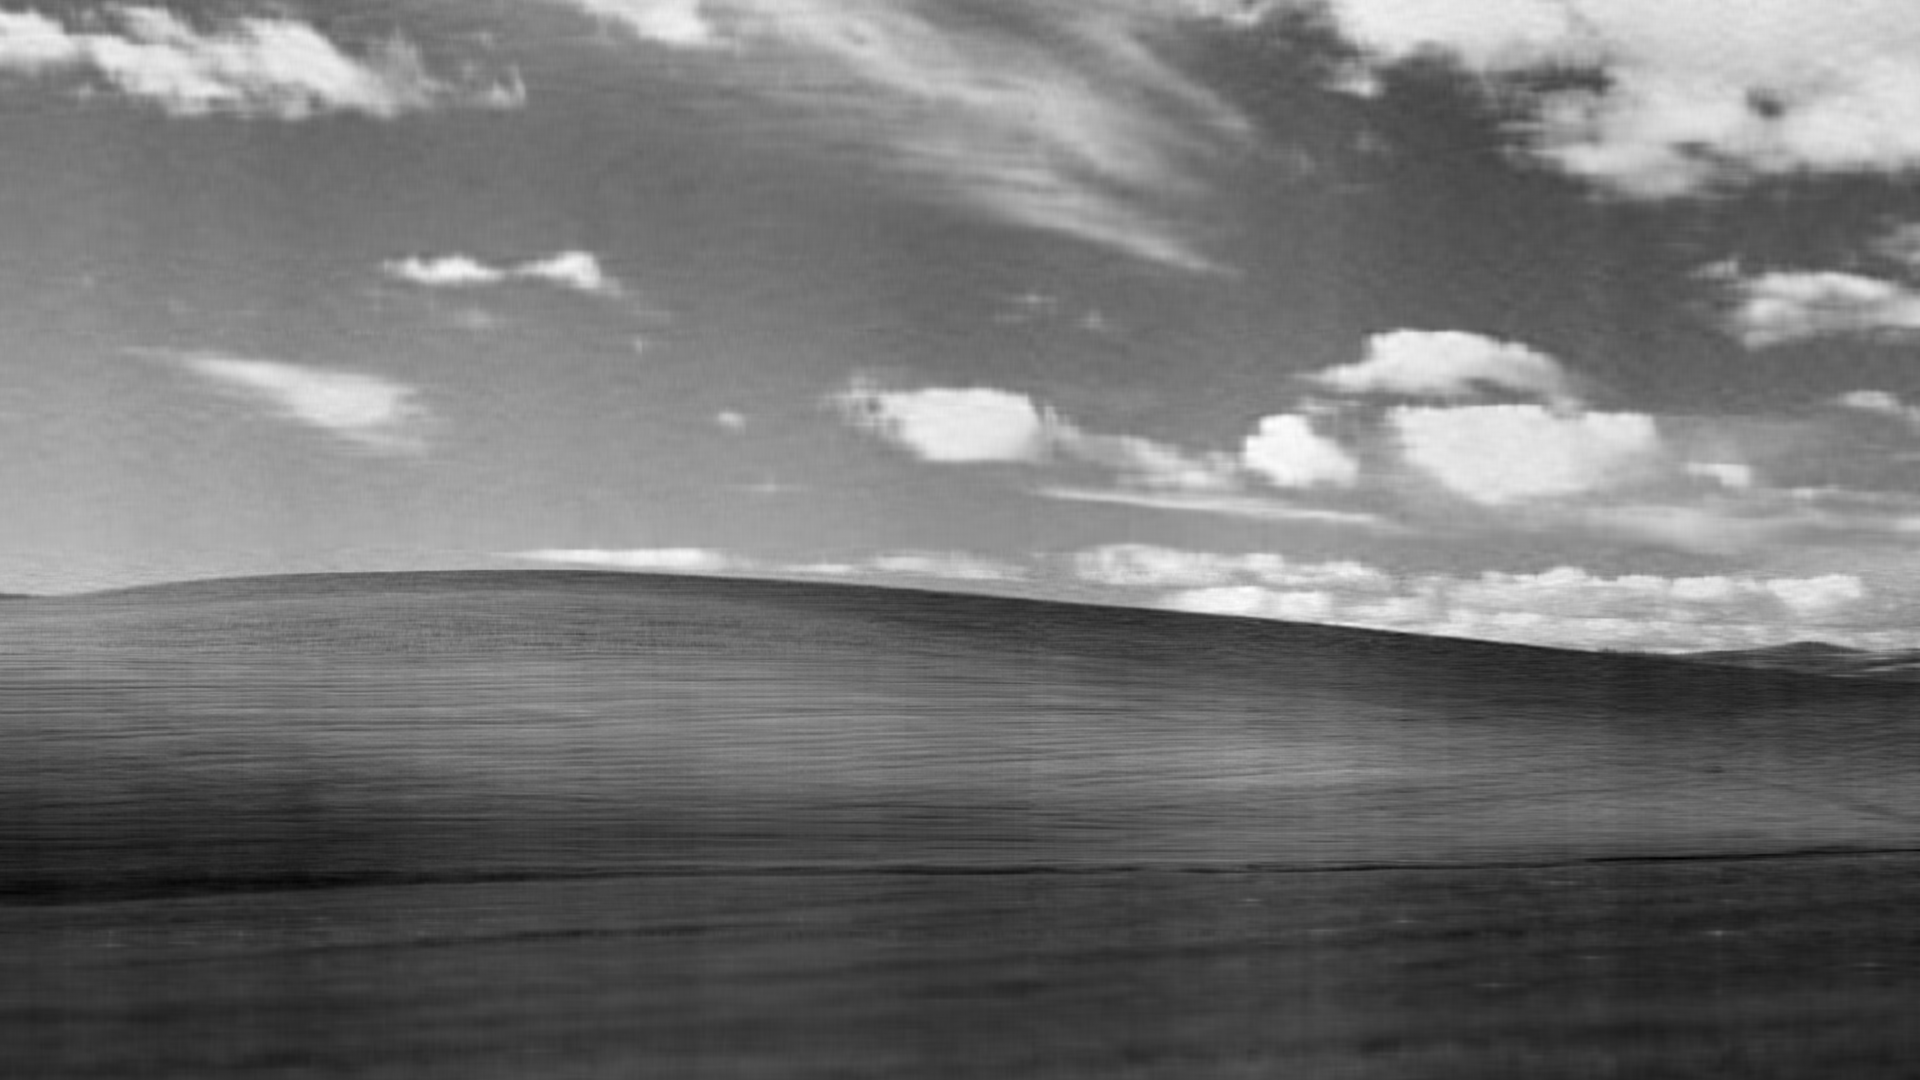

In [56]:
X_r = X_r + abs(X_r.min()) # format because some values negative but for an image we want values in 0 to 255
X_r = X_r * 1/X_r.max() * 255 # format 

img_pca = Image.fromarray(X_r.astype(dtype = np.uint8))
img_pca

In [58]:
# not pretty but W and H take up less space

NMF

In [57]:
# NMF converges to something similar to PCA

In [59]:
k = 50 #hyperparameter

#NMF
model = NMF(n_components=k, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

print(W.shape)
print(H.shape)

(1080, 50)
(50, 1920)


C:\Users\hanna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


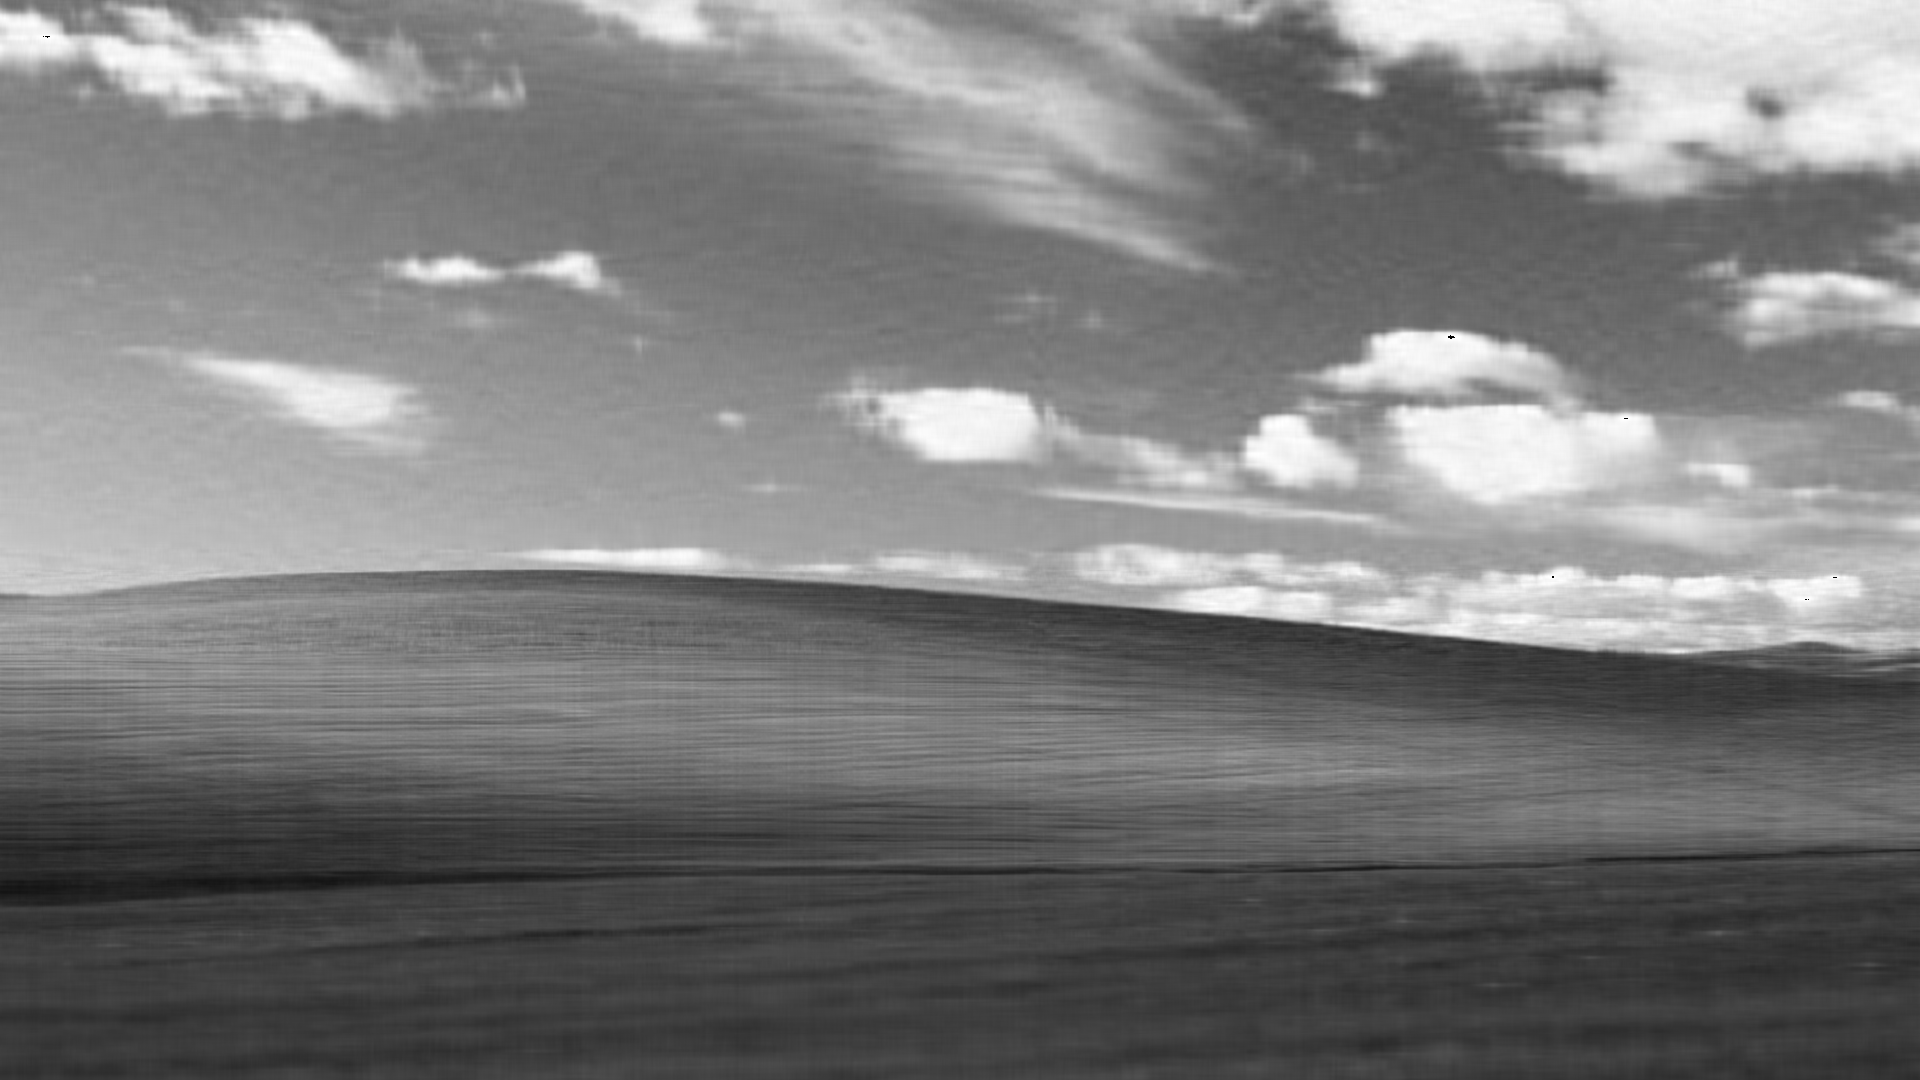

In [60]:
#Recontruction
X_r = W @ H

img_nmf = Image.fromarray(X_r.astype(dtype = np.uint8))

img_nmf

K-Means

In [62]:
# For this example we used K means to reduce the number of colors.

In [68]:
img_size = X.shape
X_flat = X.flatten()[np.newaxis,:].T


print(X_flat.shape) # contains just as many elements as the image
X_flat

(2073600, 1)


array([[119.],
       [119.],
       [119.],
       ...,
       [ 47.],
       [ 44.],
       [ 42.]])

In [69]:
#k means
k = 50
centroid, label, inertia = k_means(
    X_flat, n_clusters=k, n_init="auto", random_state=0
)

centroid.shape # cluster elements are in 1d because one gray shade, contains 50 shades

(50, 1)

In [70]:
for i_th in range(len(label)):
     X_flat[i_th] = centroid[label[i_th]] #replace colors with cluster colors

print(X_flat.shape) # contains just as many elements as the image
X_flat

(2073600, 1)


array([[118.47465932],
       [118.47465932],
       [118.47465932],
       ...,
       [ 45.36173111],
       [ 45.36173111],
       [ 39.02728471]])

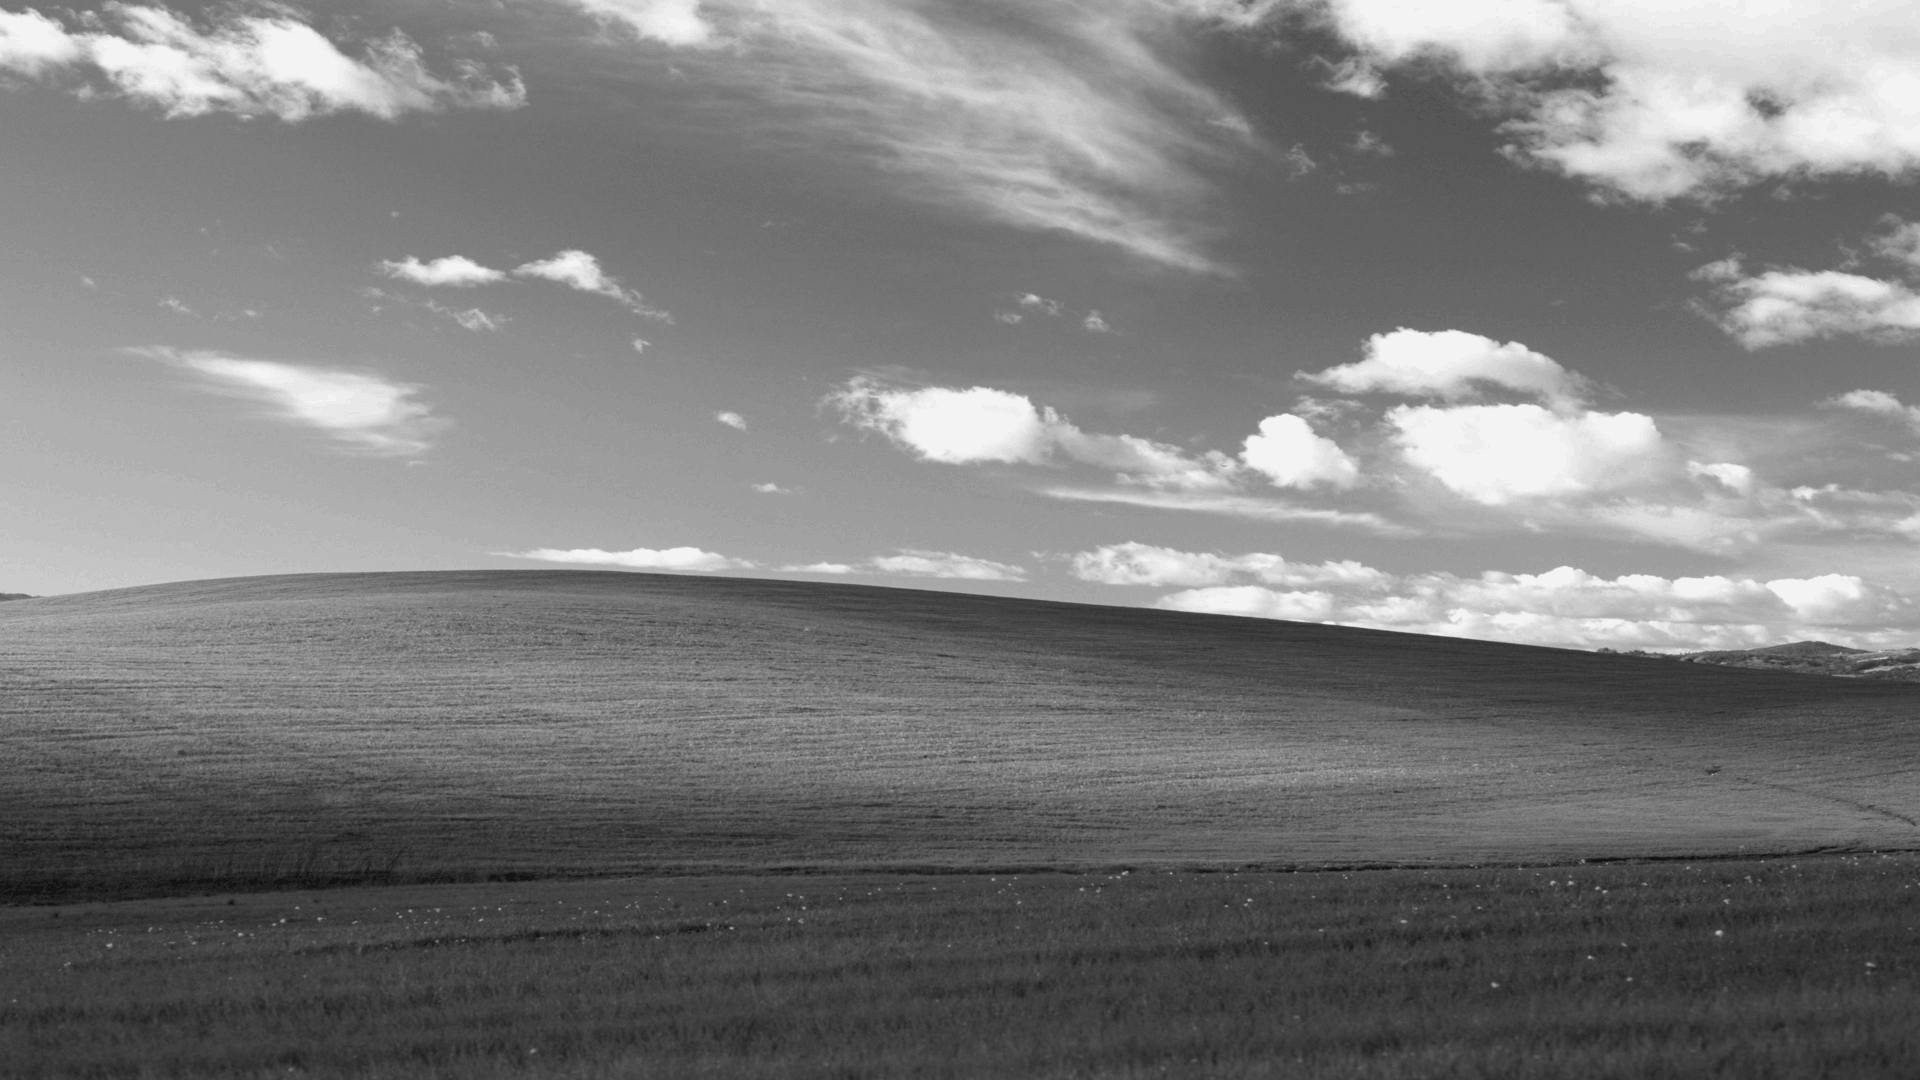

In [71]:
X_r = X_flat.reshape(img_size) # reshape image size
img_kmeans = Image.fromarray(X_r.astype(dtype = np.uint8)) # rounding floats to integers for png file
img_kmeans

K-means extra

In [ ]:
# What if we want to find edges in this image?

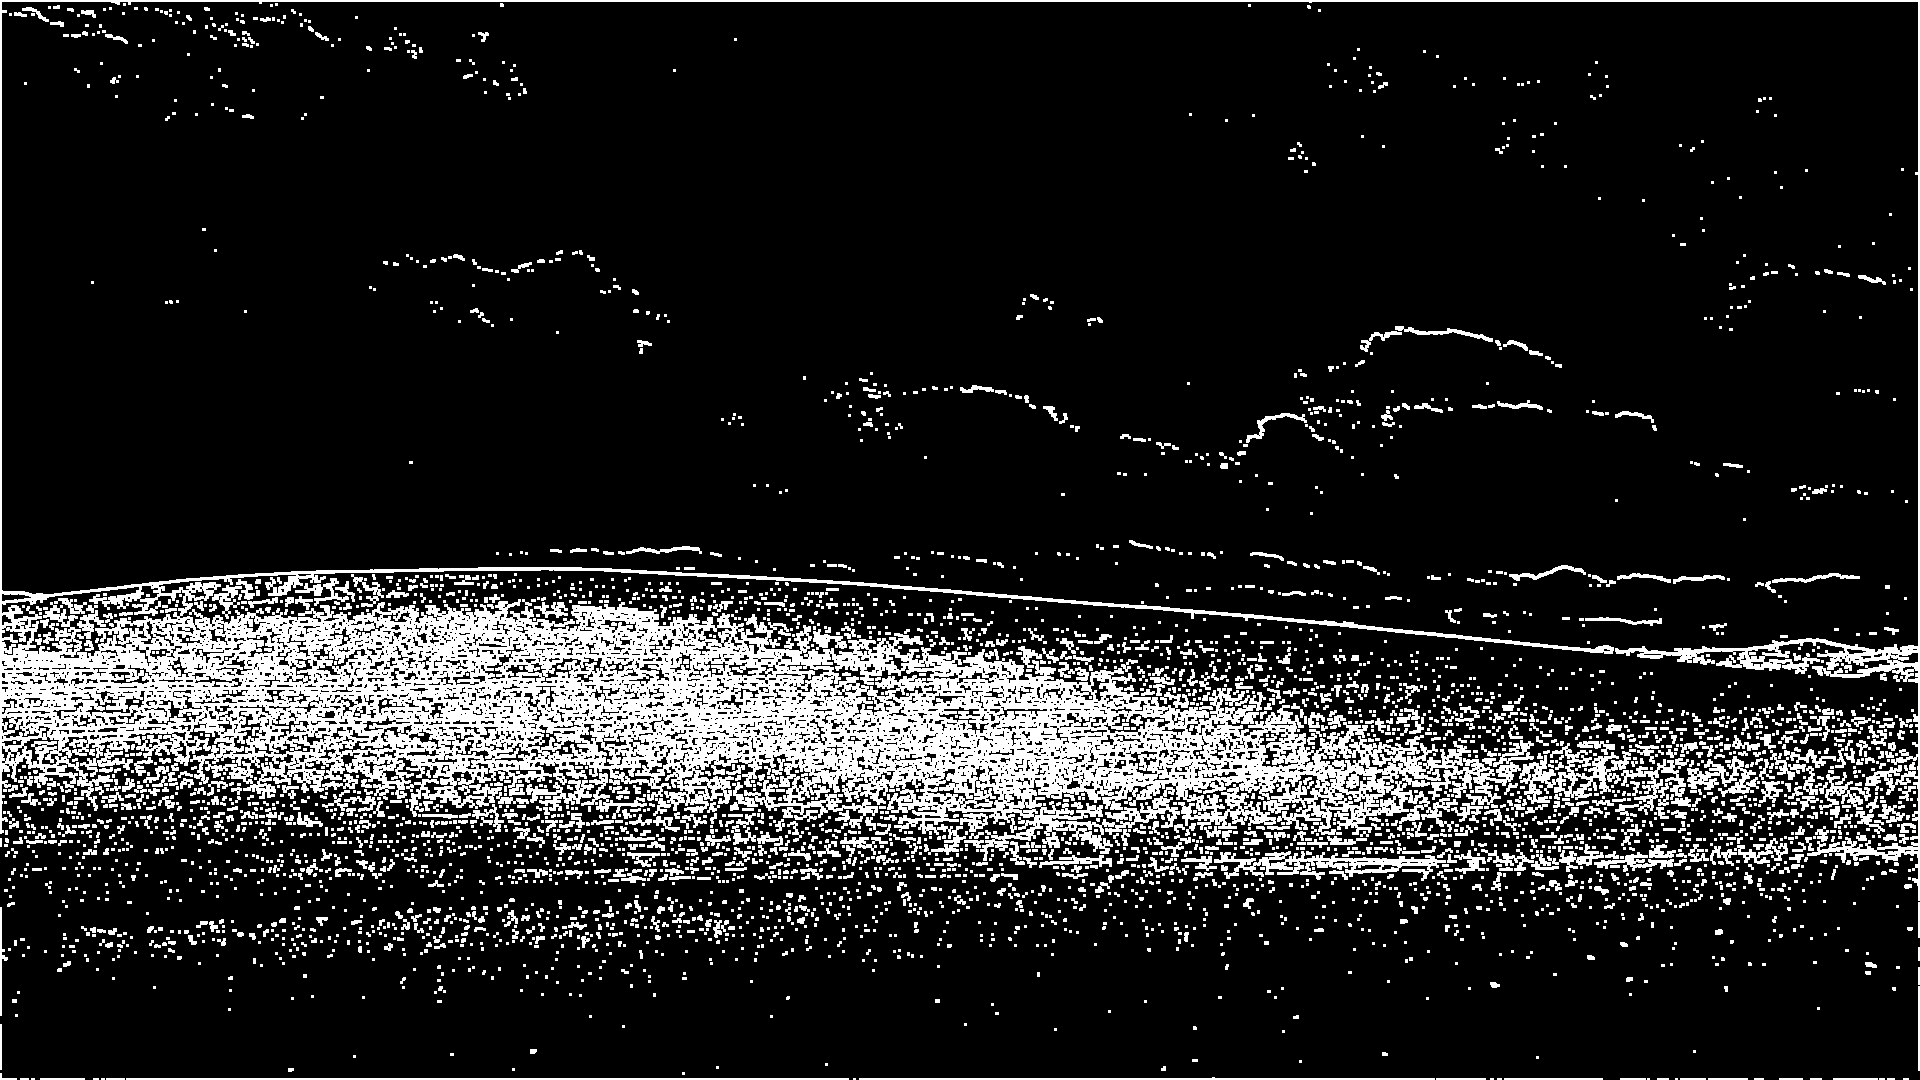

In [73]:
# We can use an edge detection algorithm on our image

img_edges = img.filter(ImageFilter.FIND_EDGES) #find edges
img_edges = img_edges.filter(ImageFilter.MaxFilter()) #thicken edges

img_edges = img_edges.convert('L') #convert to gray
img_edges = img_edges.point(
    lambda x : 255 if x > 50 else 0, mode='1') # turns every pixel that is not black into white
img_edges.save("bliss_50_edges.png")
img_edges

In [ ]:
# Not quite what we want? Idea

(1080, 1920, 3)
[[[ 66. 124. 233.]
  [ 66. 124. 233.]
  [ 66. 124. 235.]
  ...
  [218. 232. 245.]
  [216. 230. 243.]
  [216. 230. 243.]]

 [[ 63. 123. 235.]
  [ 63. 123. 236.]
  [ 63. 123. 237.]
  ...
  [218. 232. 245.]
  [216. 230. 243.]
  [216. 230. 243.]]

 [[ 64. 125. 242.]
  [ 64. 125. 241.]
  [ 64. 125. 241.]
  ...
  [218. 232. 245.]
  [216. 230. 243.]
  [216. 230. 243.]]

 ...

 [[ 51.  73.  10.]
  [ 51.  73.   9.]
  [ 49.  71.   8.]
  ...
  [ 38.  61.  11.]
  [ 37.  59.  12.]
  [ 34.  56.  10.]]

 [[ 52.  74.   9.]
  [ 52.  74.   9.]
  [ 53.  75.  10.]
  ...
  [ 39.  60.  12.]
  [ 36.  58.  11.]
  [ 32.  53.   9.]]

 [[ 51.  73.   8.]
  [ 51.  73.   8.]
  [ 53.  75.  10.]
  ...
  [ 37.  59.  10.]
  [ 34.  56.  10.]
  [ 32.  53.  10.]]]


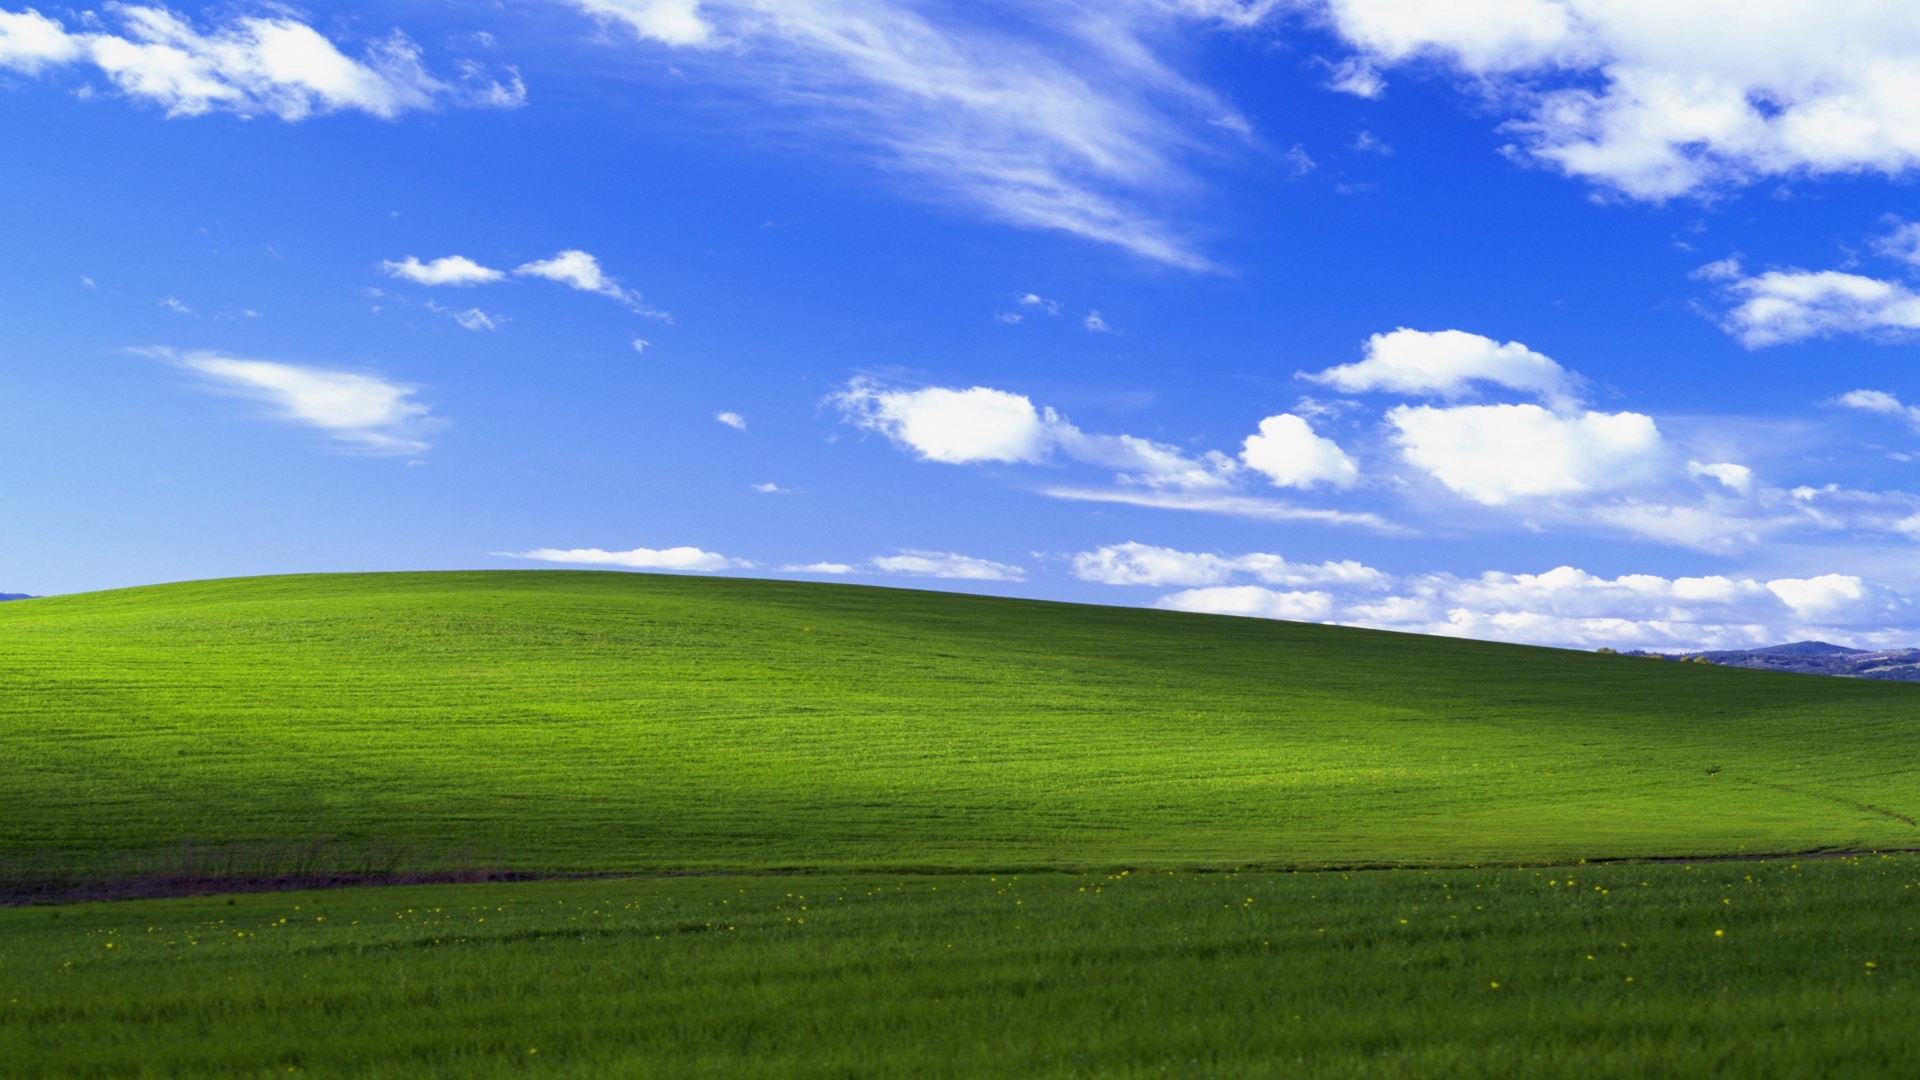

In [74]:
#Load image
img = Image.open("bliss.png")
X = np.array(img).astype(dtype= float)

print(X.shape)
print(X)
img

In [ ]:
# Clouds are white, sky is blue and grass is green... hmm... maybe we could cluster into 3 colors...

In [77]:
#Load image
img = Image.open("bliss.png")

X = np.array(img).astype(dtype= float)
img_size = X.shape

X_flat_3 = X.reshape(-1, X.shape[-1])

In [78]:
#k means
k = 3 # sky, clouds, grass
centroid, label, inertia = k_means(
    X_flat_3, n_clusters=k, n_init="auto", random_state=0
)

for i_th in range(len(label)):
     X_flat_3[i_th] = centroid[label[i_th]] #replace colors with cluster colors

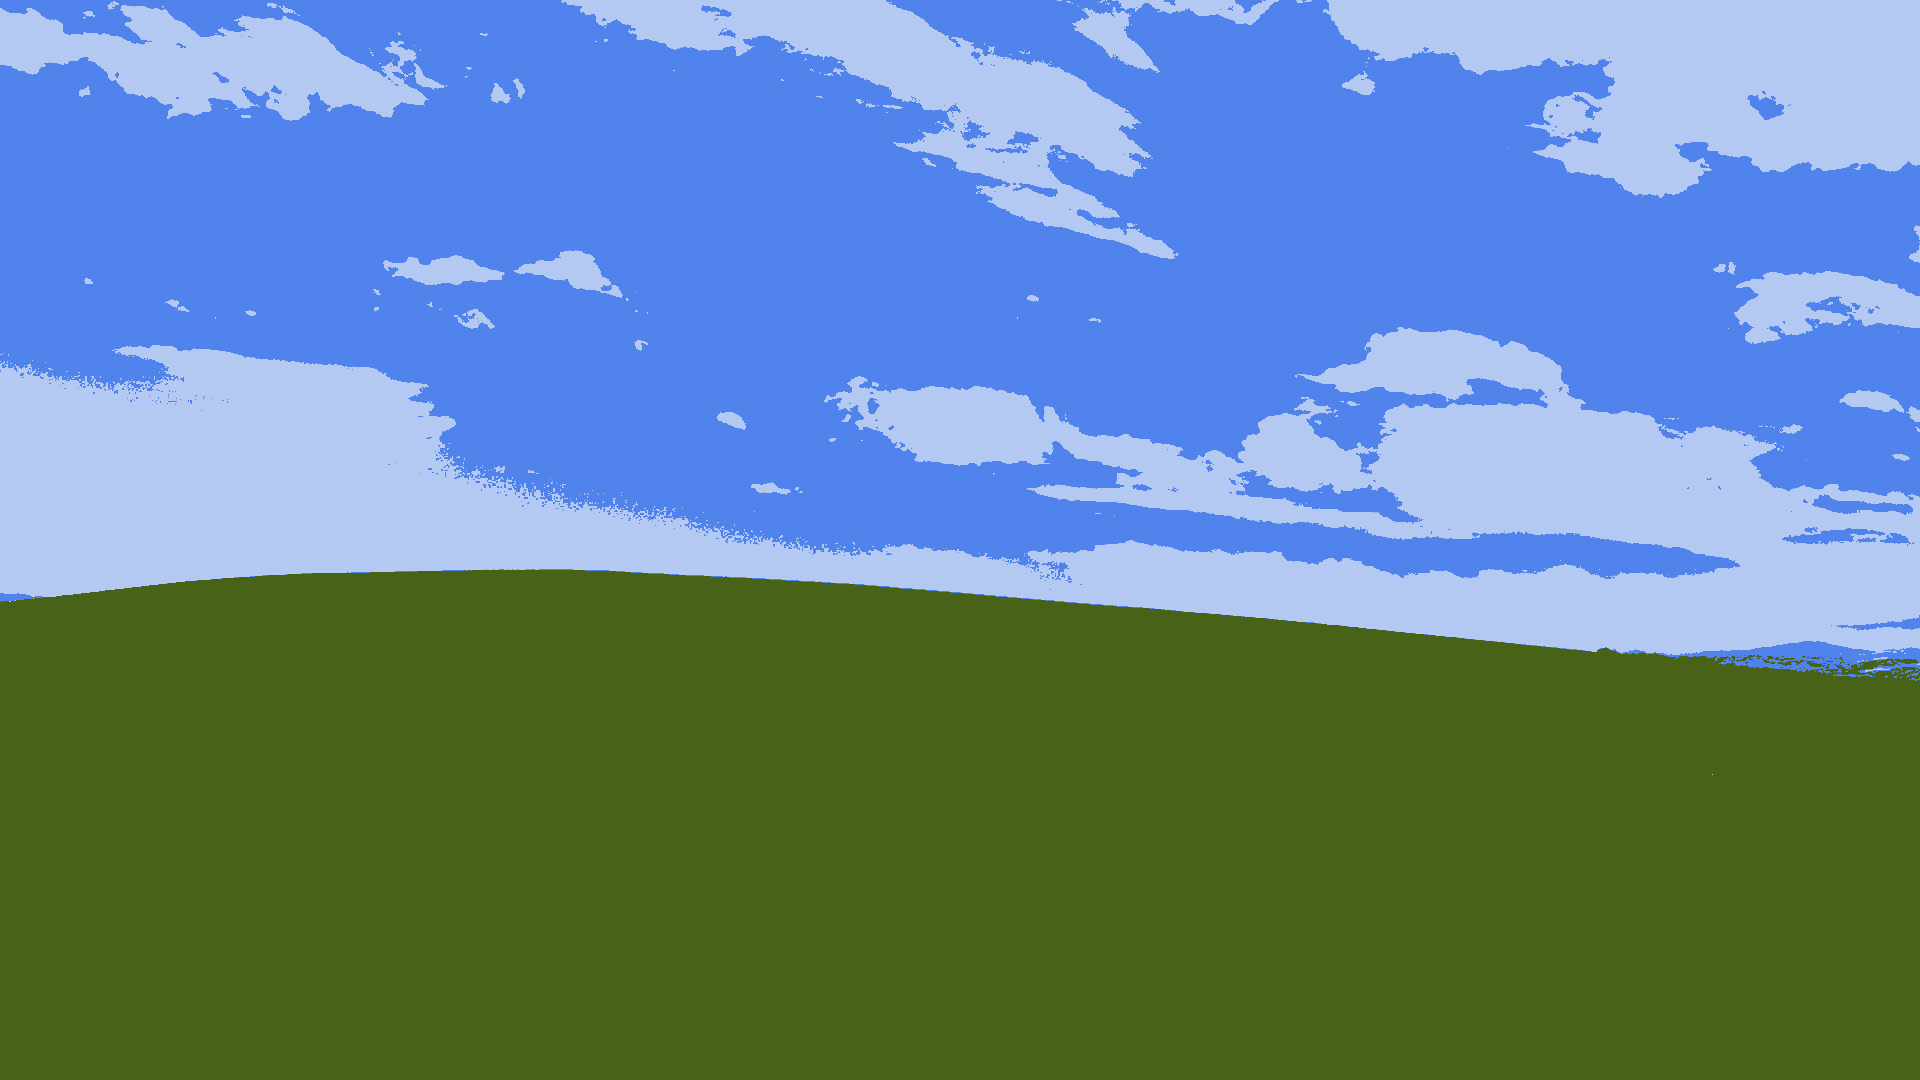

In [79]:
# reshape and show image
X_flat_3 = X_flat_3.reshape(img_size)

img_kmeans = Image.fromarray(X_flat_3.astype(dtype = np.uint8))
img_kmeans


In [80]:
# Nice! Now we have less random jumps in colors which are confusing the edge detector.

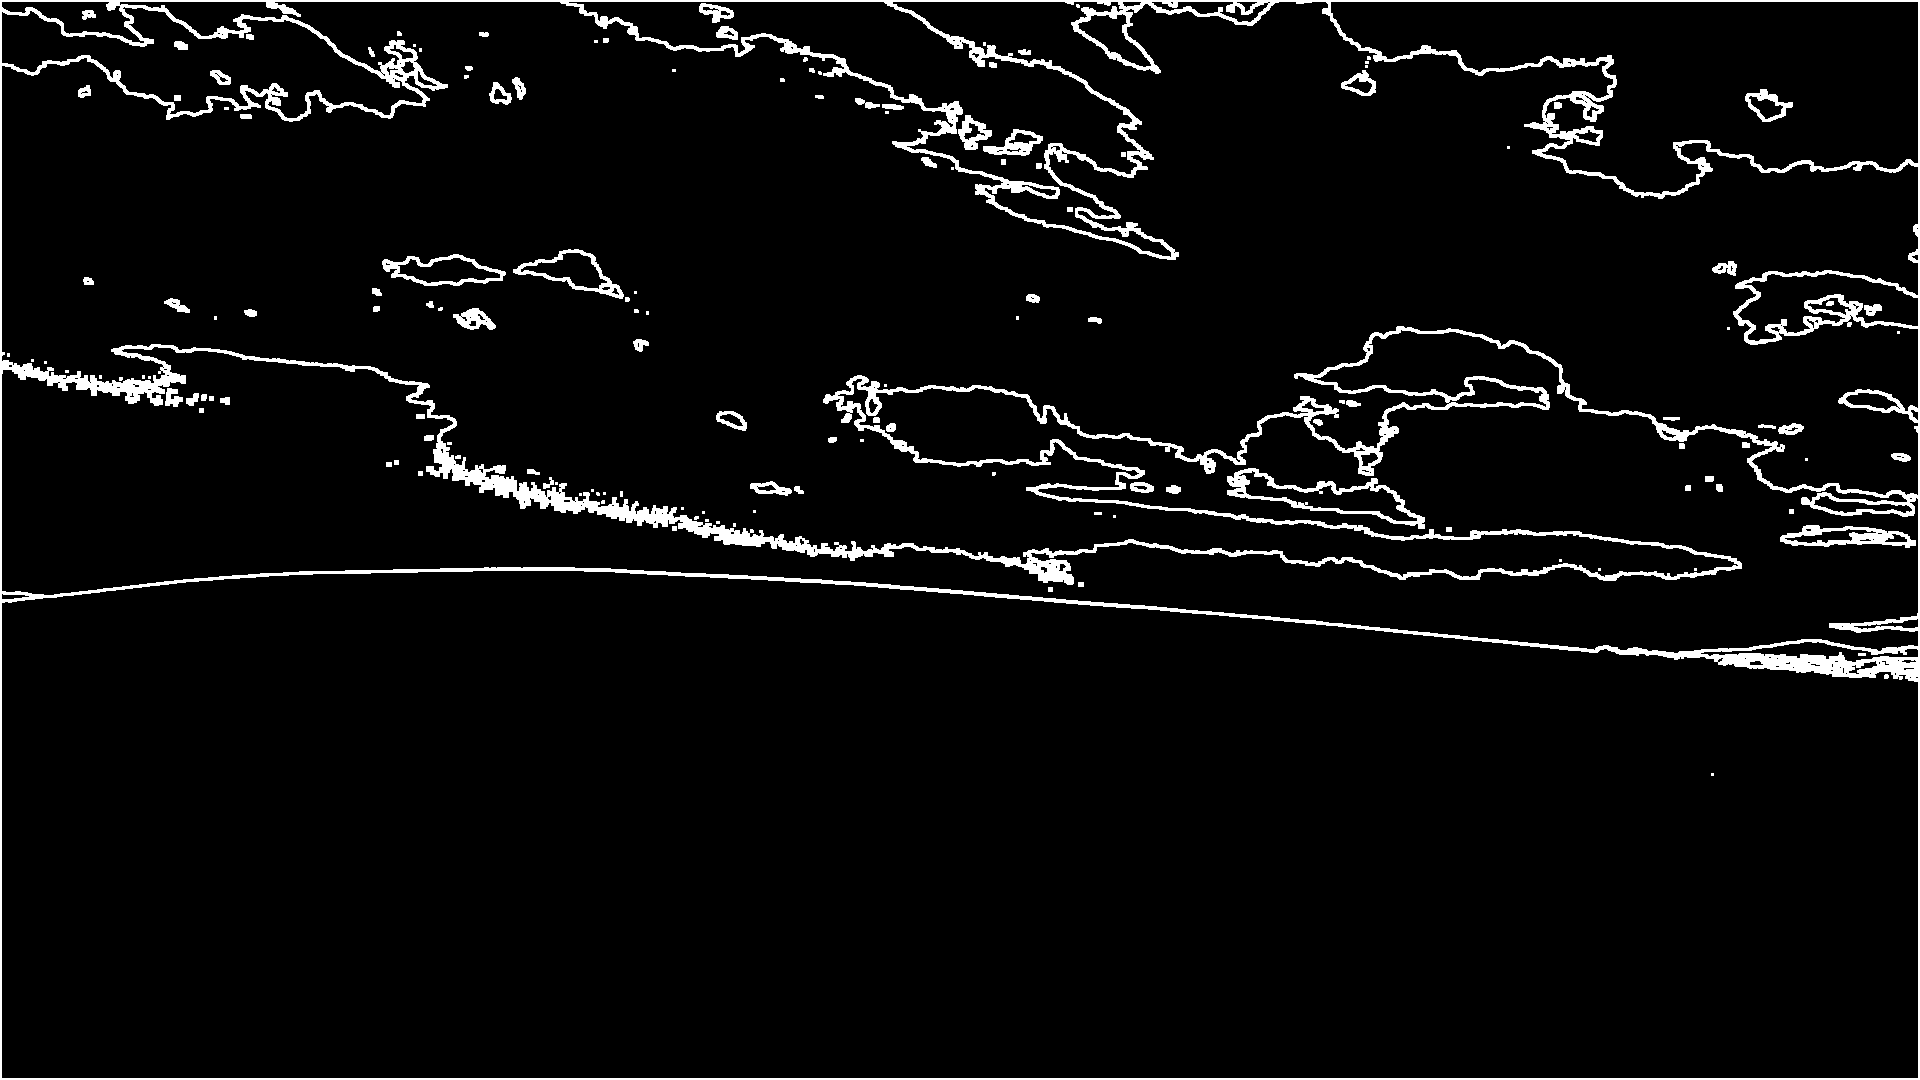

In [81]:
# Use the same edge detector again

img_kmeans_edges = img_kmeans.filter(ImageFilter.FIND_EDGES) #find edges
img_kmeans_edges = img_kmeans_edges.filter(ImageFilter.MaxFilter()) #thicken edges

img_kmeans_edges = img_kmeans_edges.convert('L') #convert to gray
img_kmeans_edges = img_kmeans_edges.point(
    lambda x : 255 if x > 0 else 0, mode='1') # turns every pixel that is not black into white
img_kmeans_edges


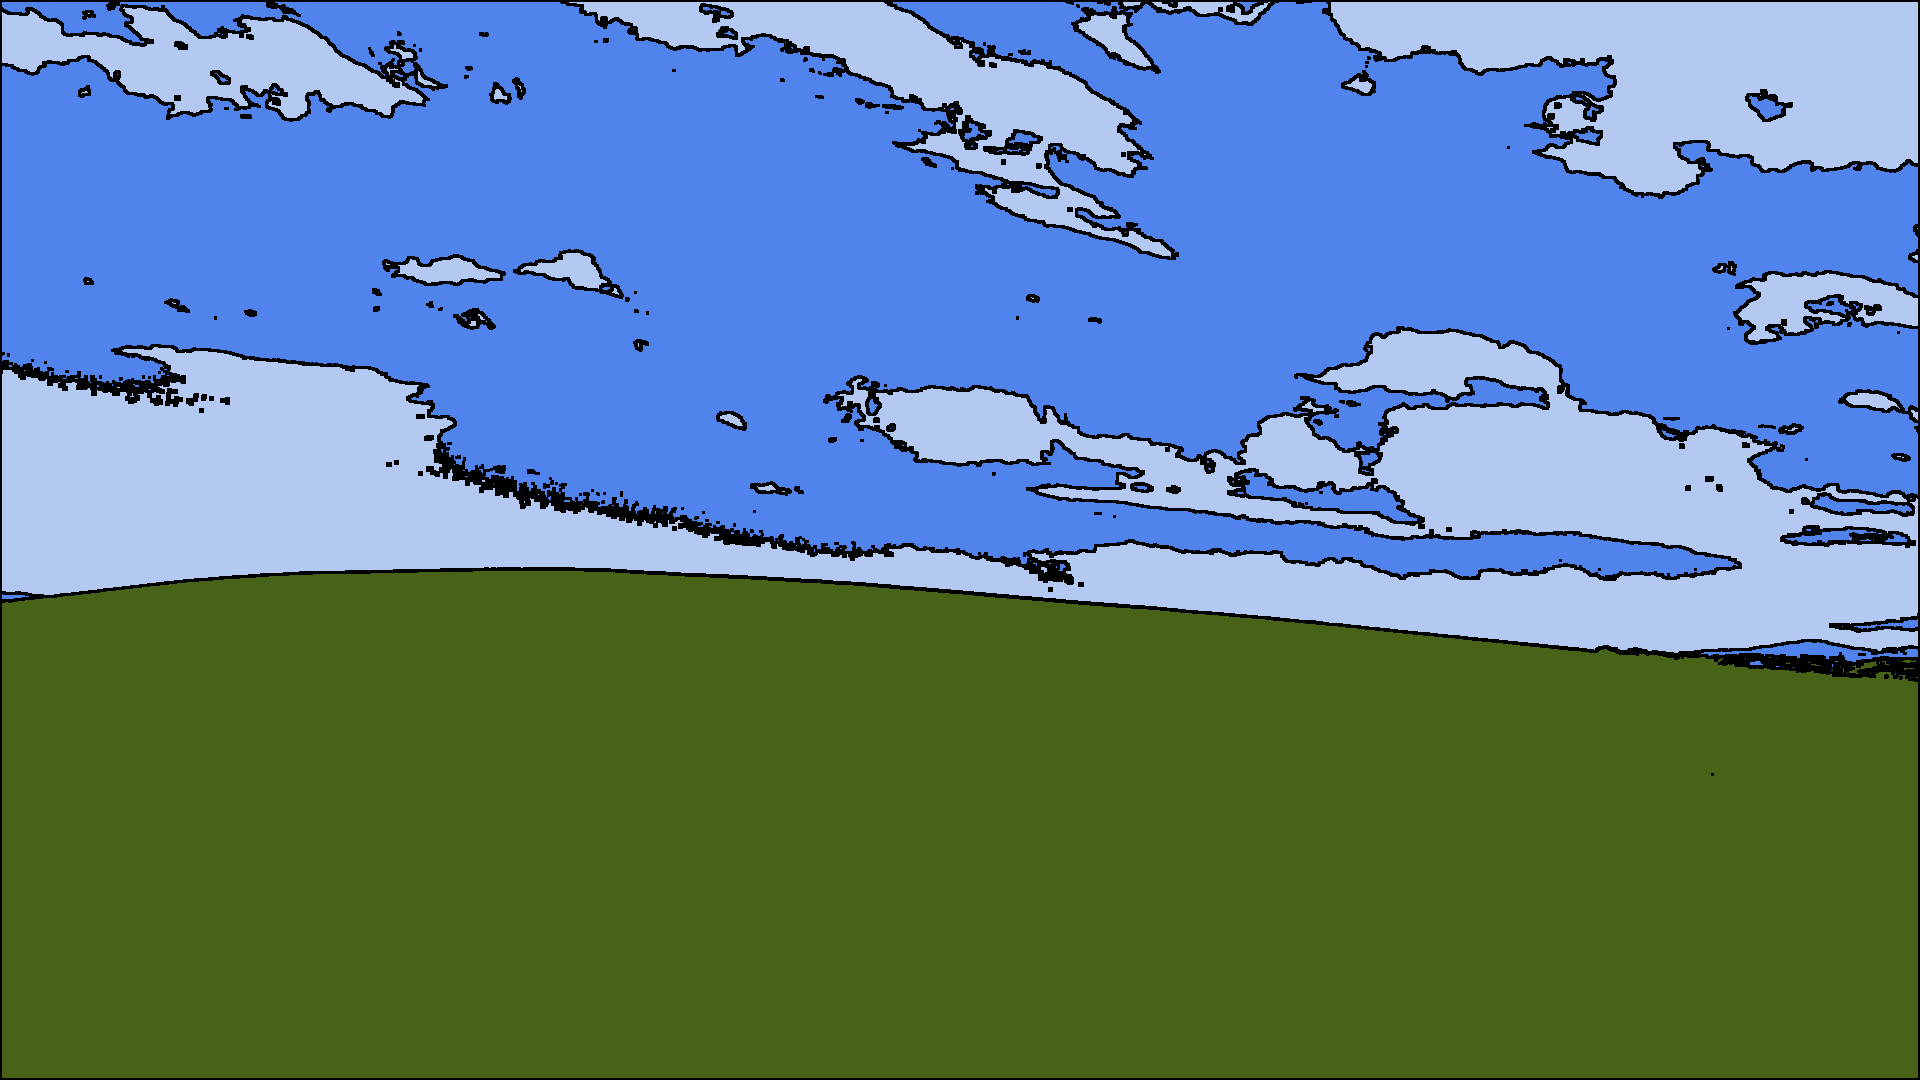

In [90]:
img_kmeans_edges = img_kmeans_edges.convert('RGB') 

ImageChops.subtract(img_kmeans, img_kmeans_edges)

In [105]:
def edge(img):
    img_kmeans_edges = img.filter(ImageFilter.FIND_EDGES) #find edges
    img_kmeans_edges = img_kmeans_edges.filter(ImageFilter.MaxFilter()) #thicken edges

    img_kmeans_edges = img_kmeans_edges.convert('L') #convert to gray
    img_kmeans_edges = img_kmeans_edges.point(
        lambda x : 255 if x > 0 else 0, mode='1') # turns every pixel that is not black into white
    return img_kmeans_edges

def k_means_algo(k, file):
    #Load image
    img = Image.open(file)

    X = np.array(img).astype(dtype= float)
    img_size = X.shape

    X_flat_3 = X.reshape(-1, X.shape[-1])

    centroid, label, inertia = k_means(
        X_flat_3, n_clusters=k, n_init="auto", random_state=0
    )

    for i_th in range(len(label)):
        X_flat_3[i_th] = centroid[label[i_th]] #replace colors with cluster colors

    # reshape
    X_flat_3 = X_flat_3.reshape(img_size)

    img_kmeans = Image.fromarray(X_flat_3.astype(dtype = np.uint8))
    return img_kmeans

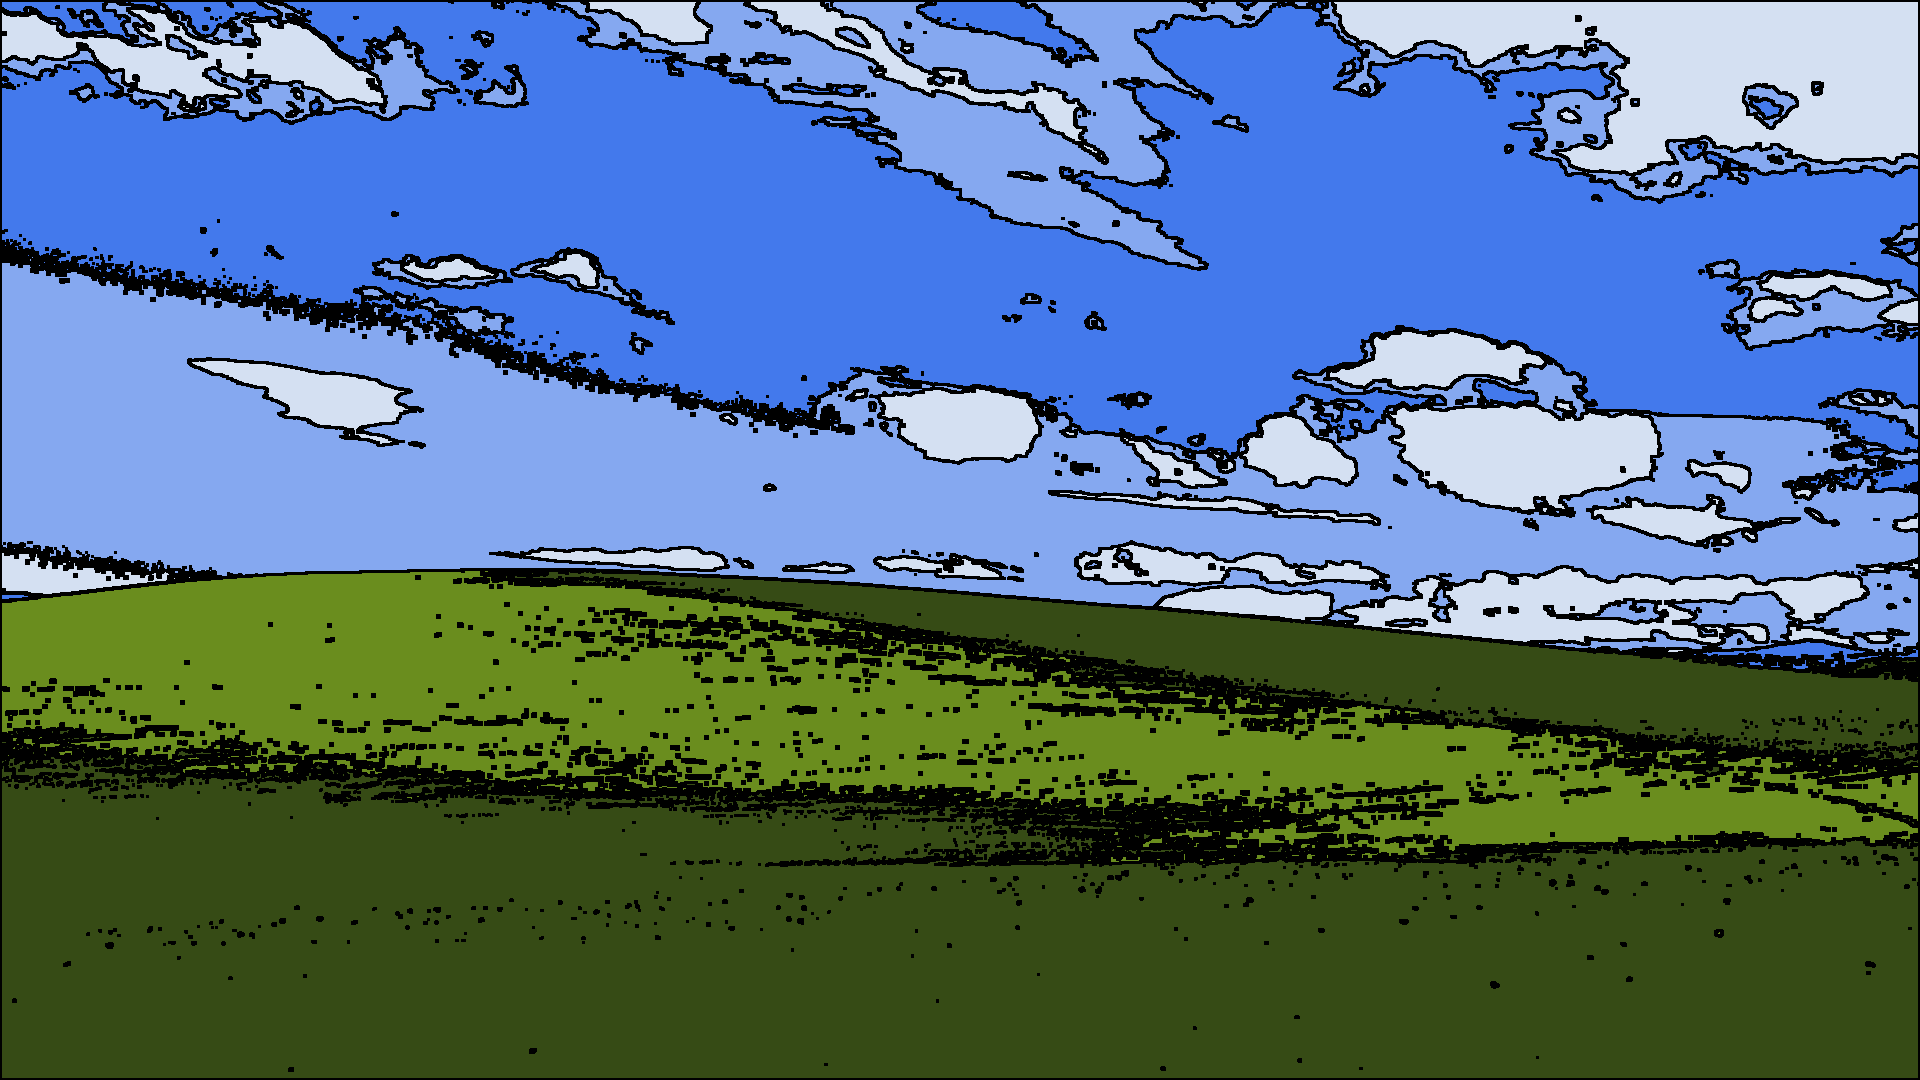

In [98]:
file = "bliss.png"
k_means_img = k_means_algo(5, file)
k_means_img_edge = edge(k_means_img)
k_means_img_edge = k_means_img_edge.convert('RGB') 

ImageChops.subtract(k_means_img, k_means_img_edge)
